# **FINAL_SUBMISSION**

**THE CHALLANGE**


Help find ways to improve the performance of machine learning and predictive models by filling in gaps in the datasets prior to model training.




ANATOMY OF THE CHALLANGE:


DO WHAT?

Improve performance of Machine Learning (ML) models by collecting a complete and continuous sensor data stream.

WHY DID IT HAPPEN?

*  Sensor issues or signal noise due to experimental environment/setup
*  Corrupted of data
*  Loss of data during transmission (also due to limited bandwidth of transmission)
*  Interference
*  Limited amount of power for data collection and transmission


WHAT IT DOES?

*  Limits the ability to train accurate ML models to predict features/characteristics in data, which in turn renders the data "useless"
*  Hinders the collection of good-quality data silos


HOW TO SOLVE/OBJECTIVE?

*  By "filling in" the missing datapoints in the datasets
*  By "generating" the missing datapoints in the datasets
*  By eliminating/removing the noisy/corrupted information that is embedded in individual datapoints



DO IT WHEN?

*  Prior to training, i.e. during data cleaning and preprocessing.






We started by investigating the reasons behind data loss when the data is acquired through a sensor or sensor array. In addition, we also started doing research finding the reasons behind the loss.

Our research concluded that data loss in any dataset does not only occur due to missing data (be it discreet or continuous/timeseries) but also due to incomplete or corrupted or noisy collection of these data that are acquired by the sensors due to the reasons mentioned above.



---



HYPOTHESIS:



We propose an end-to-end Machine learning pipeline to -fill in the missing data using Generative modeling which involves using a model to generate new examples that plausibly come from an existing distribution of samples.

Stacked Denoising Autoencoder for when the sensor data is corrupted or there is a bit of noise in it, we call this type of data noisy data.
To obtain proper information about the data, we want Denoising.
We define our autoencoder to remove (if not all)most of the noise our data.

Transforms the input into a lower dimensional representation, and a decoder, which tries to reconstruct the original input from the lower dimensional representation. Therefore, these models present some some sort of “bottle neck” in the middle that forces the network to learn how to compress the data in a lower dimensional space. When training these algorithms, the objective is to be able to reconstruct the original input with the minimum amount of information loss. Once the model is trained, we can compress data at will by only using the encoder component of the autoencoder.


---
**(A)**

DETAILS:
One model is called the “generator” or “generative network” model that learns to generate new plausible samples. The other model is called the “discriminator” or “discriminative network” and learns to differentiate generated examples from real examples.

The two models are set up in a contest or a game (in a game theory sense) where the generator model seeks to fool the discriminator model, and the discriminator is provided with both examples of real and generated samples.

After training, the generative model can then be used to create new plausible samples on demand.

----


**(B)**

An autoencoder is a neural network used for dimensionality reduction; that is, for feature selection and extraction. Autoencoders with more hidden layers than inputs run the risk of learning the identity function – where the output simply equals the input – thereby becoming useless.

Denoising autoencoders are an extension of the basic autoencoder, and represent a stochastic version of it. Denoising autoencoders attempt to address identity-function risk by randomly corrupting input (i.e. introducing noise) that the autoencoder must then reconstruct, or denoise.

Stacked Denoising Autoencoder

A stacked denoising autoencoder is simply many denoising autoencoders strung together.

A key function of SDAs, and deep learning more generally, is unsupervised pre-training, layer by layer, as input is fed through. Once each layer is pre-trained to conduct feature selection and extraction on the input from the preceding layer, a second stage of supervised fine-tuning can follow.

A word on stochastic corruption in SDAs: Denoising autoencoders shuffle data around and learn about that data by attempting to reconstruct it. The act of shuffling is the noise, and the job of the network is to recognize the features within the noise that will allow it to classify the input. When a network is being trained, it generates a model, and measures the distance between that model and the benchmark through a loss function. Its attempts to minimize the loss function involve resampling the shuffled inputs and re-reconstructing the data, until it finds those inputs which bring its model closest to what it has been told is true.

---

**(C)**

Encoder network: It translates the original high-dimension input into the latent low-dimensional code. The input size is larger than the output size.
Decoder network: The decoder network recovers the data from the code, likely with larger and larger output layers.

The encoder network essentially accomplishes the dimensionality reduction, just like how we would use Principal Component Analysis (PCA) or Matrix Factorization (MF) for. In addition, the autoencoder is explicitly optimized for the data reconstruction from the code.



---

**(D)**

Disentangled Variational autoencoders

The idea of Variational Autoencoder  is actually less similar to all the autoencoder models above, but deeply rooted in the methods of variational bayesian and graphical model.
Instead of mapping the input into a fixed vector, we want to map it into a distribution.
If each variable in the inferred latent representation is only sensitive to one single generative factor and relatively invariant to other factors, we will say this representation is disentangled or factorized. One benefit that often comes with disentangled representation is good interpretability and easy generalization to a variety of tasks.

For example, a model trained on photos of human faces might capture the gentle, skin color, hair color, hair length, emotion, whether wearing a pair of glasses and many other relatively independent factors in separate dimensions. Such a disentangled representation is very beneficial to facial image generation.


https://lilianweng.github.io/lil-log/2018/08/12/from-autoencoder-to-beta-vae.html#beta-vae




# **Proof of Concept #3**

# **NASA Meteorite Landing dataset: Recovering/approximating/imputing missing values**

# **# Algorithm: Deep Convolutional Generative Adversarial Network (DCGAN)**

# **Our approach**

Here, we are transforming each sample (row) of the Meteorite CSV dataset into an image. The dataset has 45716 rows and 9 columns, including metorites' names and IDs. Our algorithm transforms each row it into a 3x3 image and zero pads the outer periphery of the 3x3 matrix (to make it a 7x7 matrix) so that each row fits into a 2D Convolutional filter. Then, once the training and evaluation is complete, we plan to recover the original data (CSV) from the images generated by the DCGAN.

# **Challenges**

There are mainly 2 challenges that we faced (#1 and #2) while implementing this demo. #3 is our planned future work.



1.   The dataset is probably not big enough for a regular Convolutional Neural Network (CNN)-based DCGAN architecture.
2.   We had to encode all categorical values to numeric values, including the names. The problem here was our label encoder generated different numeric values for the meteorite names compared to their IDs. We chose not to exclude these two columns from the dataset for the sake of architectural simplicity at this moment.


# **Future work**
Due to time constraints, we are yet to recover the generated csv data from the output images and evaluate whether the algorithm converged or not. If it did not converge, then we plan to tune the hyperparameters, modify the CNN architecture if necessary and re-train the DCGAN algorithm.


### Import TensorFlow and other libraries

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [0]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [0]:
# To generate GIFs
!pip install imageio

In [0]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import time
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from IPython import display

### Load and prepare NASA Meteorite dataset for **training**

In [0]:
##### Initialize training dataset #####

# mount google drive location where you saved a .zip archive of your folder that contains images; then unzip the file
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My\ Drive/Colab\ Notebooks/NASA-challenge-sample-datasets/

/content/drive/My Drive/Colab Notebooks/NASA-challenge-sample-datasets


**Load dataset and encode categorical values**

In [0]:
# Load dataset and encode categorical values
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NASA-challenge-sample-datasets/Meteorite_Landings_clean.csv')
df_filled = df.fillna(0)

# Encode categorical values
label_enc = preprocessing.LabelEncoder()
data_clean = df_filled.apply(lambda series: pd.Series(label_enc.fit_transform(series), index=series.index))
#data_clean.to_csv('Meteorite_not_normalized.csv',index=True)

# Normalize numeric data only (range: 0-255)
first_2_col = data_clean[data_clean.columns[:2]]
minmax = MinMaxScaler(feature_range=(0, 255), copy=True)
data_norm_minmax = minmax.fit_transform(data_clean[['nametype', 'recclass', 'mass (g)', 'fall', 'year_numeric', 'reclat', 'reclong']])

#data_norm = normalize(data_clean[['nametype', 'recclass', 'mass (g)', 'fall', 'year_numeric', 'reclat', 'reclong']])

dataset_complete = np.hstack((first_2_col, data_norm_minmax))
#np.savetxt("Meteorite_clean_minmax.csv", dataset_complete, delimiter=",")


**Start zero padding the data so that it fits into a 2D Convolutional filter**

In [0]:
## Start zero padding the data so that it fits into a 2D Convolutional filter
zeros_vert = np.zeros((3, 2))
zeros_hori = np.zeros((2, 7))
zeros_vert.shape, zeros_hori.shape, dataset_complete.shape

((3, 2), (2, 7), (45716, 9))

In [0]:
# Rehsape data and pad zeros to increase dimensionality
dataset_intermed = dataset_complete.reshape(dataset_complete.shape[0], 3, 3).astype('float32')
dataset_intermed.shape

(45716, 3, 3)

In [0]:
# Pad zeros horizontally
dataset_hor_pad = []
for i in range(dataset_intermed.shape[0]):
  dataset_hor_pad_1 = np.hstack((zeros_vert, dataset_intermed[i,:,:], zeros_vert))
  dataset_hor_pad.append(dataset_hor_pad_1)

dataset_hor_pad = np.array(dataset_hor_pad)
dataset_hor_pad_1.shape, dataset_hor_pad.shape

((3, 7), (45716, 3, 7))

In [0]:
# Pad zeros vertically
dataset_ver_pad = []
for i in range(dataset_hor_pad.shape[0]):
  dataset_ver_pad_1 = np.vstack((zeros_hori, dataset_hor_pad[i,:,:], zeros_hori))
  dataset_ver_pad.append(dataset_ver_pad_1)

dataset_padded = np.array(dataset_ver_pad)
dataset_ver_pad_1.shape, dataset_padded.shape

((7, 7), (45716, 7, 7))

In [0]:
dataset_padded[1111,:,:]

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   2.        ,   2.        ,
        255.        ,   0.        ,   0.        ],
       [  0.        ,   0.        , 100.90322876, 157.19761658,
        255.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  80.52631378, 190.19392395,
          9.96379566,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]])

**Reshape training data, define batch and buffer sizes**

In [0]:
# Reshape training data, define batch and buffer sizes
dataset = dataset_padded.reshape(dataset_padded.shape[0], 7, 7, 1).astype('float32')

# Initialize buffer and batch size
BUFFER_SIZE = dataset_padded.shape[0]
BATCH_SIZE = 256

# BATCH and SHUFFLE the data
train_dataset = tf.data.Dataset.from_tensor_slices(dataset).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [0]:
dataset.shape

(45716, 7, 7, 1)

## Create the models

Both the generator and discriminator are defined using the [Keras Sequential API](https://www.tensorflow.org/guide/keras#sequential_model).

### The Generator

The generator uses `tf.keras.layers.Conv2DTranspose` (upsampling) layers to produce an image from a seed (random noise). It starts with a **`Dense` layer that takes this seed as input**, then **upsamples it several times until it reaches the desired image size** of 28x28x1. Notice the `tf.keras.layers.LeakyReLU` activation for each layer, except the output layer which uses tanh.

In [0]:
# Create generator

def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 7, 7, 1)

    return model

**Use the (as yet untrained) generator to create an image.**

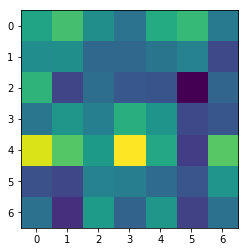

In [0]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0])

### The Discriminator

The discriminator is a CNN-based image classifier.

In [0]:
# Create a discriminator to police the generator (notice the input shape of the first Conv2D layer)

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[7, 7, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

**Use the (as yet untrained) discriminator to classify the generated images as real or fake. The model will be trained to output positive values for real images, and negative values for fake images.**

In [0]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00597883]], shape=(1, 1), dtype=float32)


## Define the loss and optimizers

Define loss functions and optimizers for both models.


In [0]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

### Discriminator loss

This method quantifies how well the discriminator is able to distinguish real images from fakes. It compares the discriminator's predictions on real images to an array of 1s, and the discriminator's predictions on fake (generated) images to an array of 0s.

In [0]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

### Generator loss
The generator's loss quantifies how well it was able to trick the discriminator. Intuitively, if the generator is performing well, the discriminator will classify the fake images as real (or 1). Here, we will compare the discriminators decisions on the generated images to an array of 1s.

In [0]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

The discriminator and the generator optimizers are different since we will train two networks separately.

In [0]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

### Save checkpoints
Save and restore models, which can be helpful in case a long running training task is interrupted.

In [0]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

## Define the training loop



In [0]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

# We will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

The training loop begins with generator receiving a random seed as input. That seed is used to produce an image. The discriminator is then used to classify real images (drawn from the training set) and fakes images (produced by the generator). The loss is calculated for each of these models, and the gradients are used to update the generator and discriminator.

In [0]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [0]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as we go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

**Generate and save images**



In [0]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)
  print('prediction shape = ', predictions.shape)

  fig = plt.figure(figsize=(4,4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      #plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.imshow(predictions[i, :, :, 0])
      plt.axis('off')

  #plt.imshow(predictions[0, :, :, 0])
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

## Train the model
Call the `train()` method defined above to train the generator and discriminator simultaneously. Note, training GANs can be tricky. It's important that the generator and discriminator do not overpower each other (e.g., that they train at a similar rate).

At the beginning of the training, the generated image tiles will look like random noise. As training progresses, the tiles will look increasingly real This is the expectation when enough training data i.e. images, is provided. Usually with only a few images as input, the discriminator doesn't get the oppooertunity to police the generator properly.

prediction shape =  (16, 7, 7, 1)
CPU times: user 2min 15s, sys: 18 s, total: 2min 33s
Wall time: 7min 39s


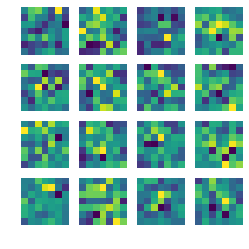

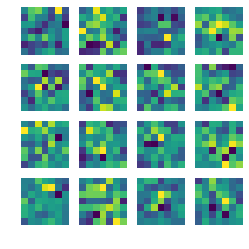

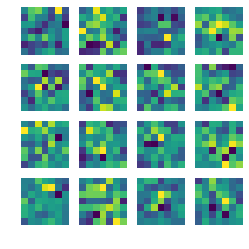

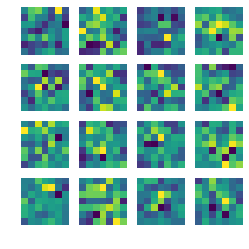

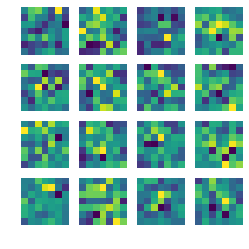

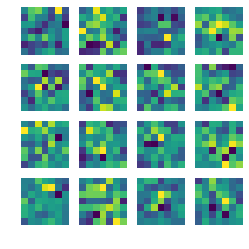

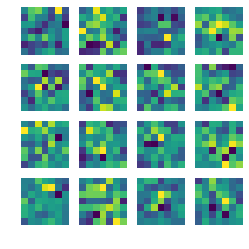

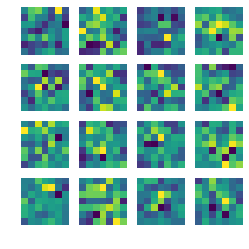

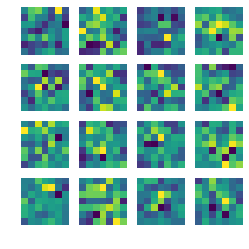

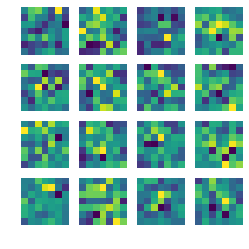

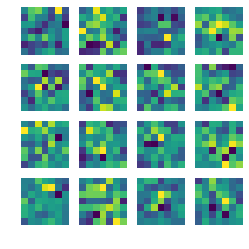

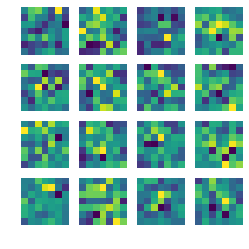

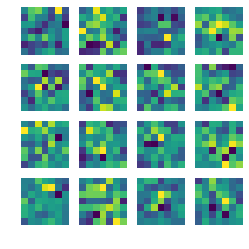

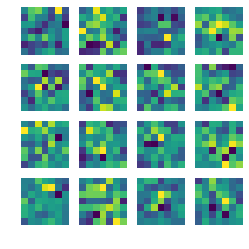

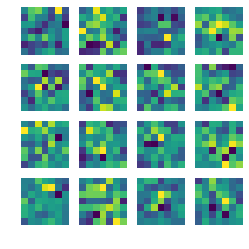

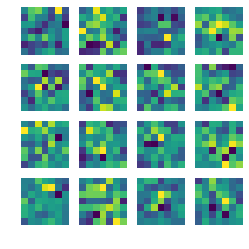

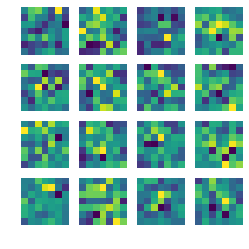

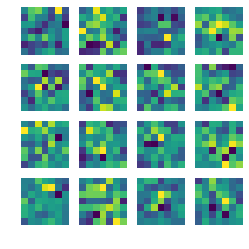

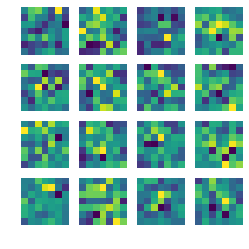

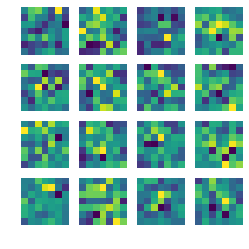

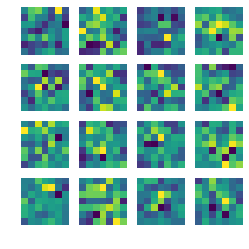

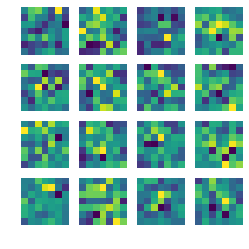

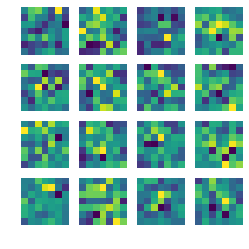

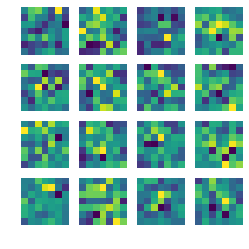

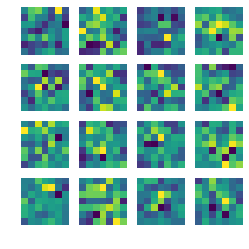

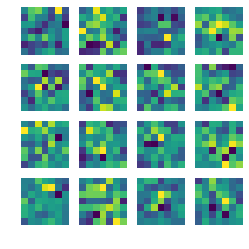

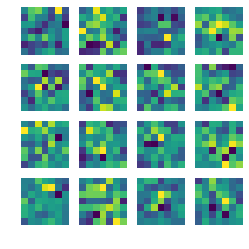

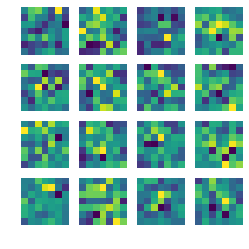

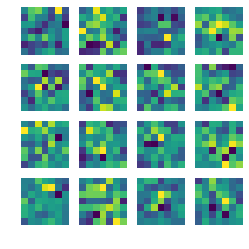

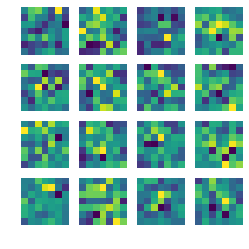

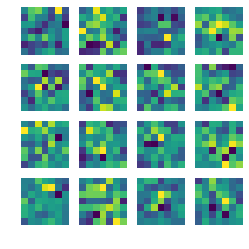

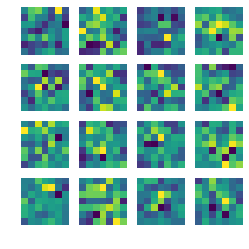

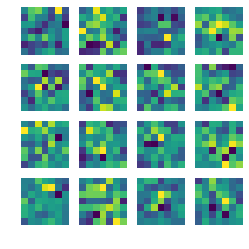

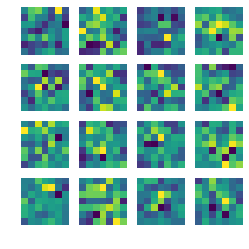

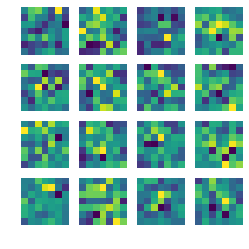

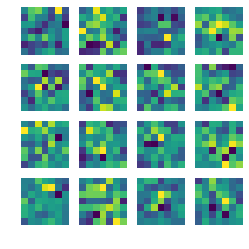

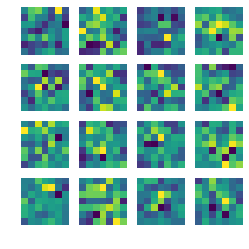

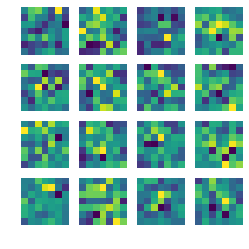

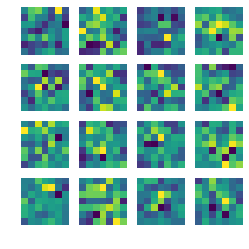

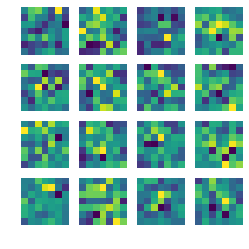

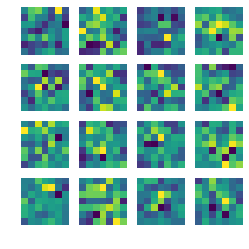

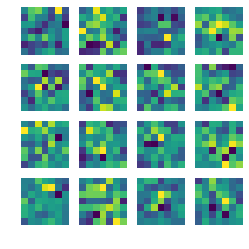

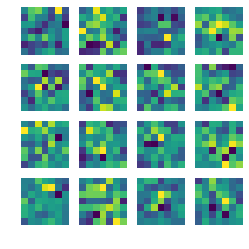

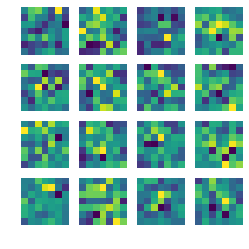

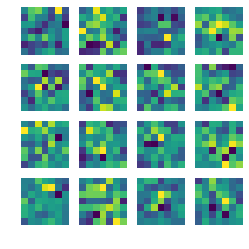

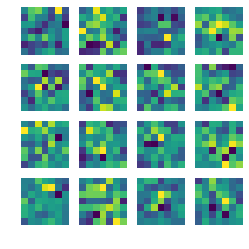

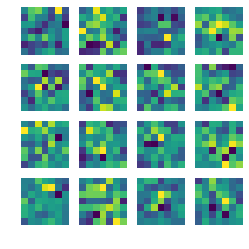

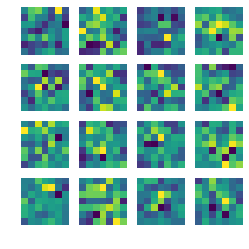

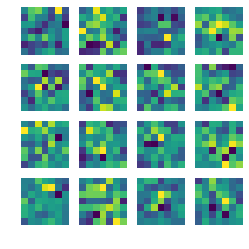

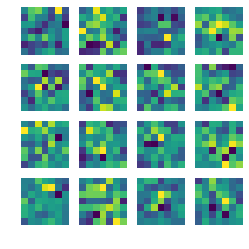

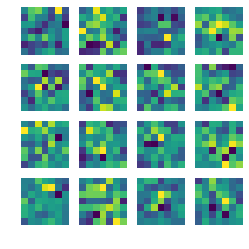

In [0]:
%%time
train(train_dataset, EPOCHS)

Restore the latest checkpoint.

In [0]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))